# Explore the data

In [1]:
import pandas as pd

data = pd.read_csv('data/wine.csv')
data.sample(10)

,Alcohol,Malic_acid,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color_intensity,Hue,OD280_315_of_diluted_wines,Proline,WineVariety
145,13.16,3.57,2.15,21.0,102,1.50,0.55,0.43,1.30,4.00,0.60,1.68,830,2
159,13.48,1.67,2.64,22.5,89,2.60,1.10,0.52,2.29,11.75,0.57,1.78,620,2
10,14.10,2.16,2.30,18.0,105,2.95,3.32,0.22,2.38,5.75,1.25,3.17,1510,0
55,13.56,1.73,2.46,20.5,116,2.96,2.78,0.20,2.45,6.25,0.98,3.03,1120,0
6,14.39,1.87,2.45,14.6,96,2.50,2.52,0.30,1.98,5.25,1.02,3.58,1290,0
142,13.52,3.17,2.72,23.5,97,1.55,0.52,0.50,0.55,4.35,0.89,2.06,520,2
61,12.64,1.36,2.02,16.8,100,2.02,1.41,0.53,0.62,5.75,0.98,1.59,450,1
153,13.23,3.30,2.28,18.5,98,1.80,0.83,0.61,1.87,10.52,0.56,1.51,675,2
107,12.72,1.75,2.28,22.5,84,1.38,1.76,0.48,1.63,3.30,0.88,2.42,488,1
137,12.53,5.51,2.64,25.0,96,1.79,0.60,0.63,1.10,5.00,0.82,1.69,515,2


# Train and Evaluate a model

1. to clean data (isnull())
2. to observe the relation between feat and label (boxplot())
3. to standardize data, to train model, to get metrics, and to plot probability (pipeline(), imshow())

In [2]:
data.isnull().sum()

Alcohol                       0
Malic_acid                    0
Ash                           0
Alcalinity                    0
Magnesium                     0
Phenols                       0
Flavanoids                    0
Nonflavanoids                 0
Proanthocyanins               0
Color_intensity               0
Hue                           0
OD280_315_of_diluted_wines    0
Proline                       0
WineVariety                   0
dtype: int64

In [13]:
cultivar = ['A', 'B', 'C']
for ind, row in data.sample(10).iterrows():
    print('[', end='')
    for i in range(len(row)):
        if i!= len(row)-1:
            print(row[i], end=' ')
        else:
            print(int(row[i]), end=' ')
    print(']', cultivar[int(row[len(row)-1])])
    

[12.0 3.43 2.0 19.0 87.0 2.0 1.64 0.37 1.87 1.28 0.93 3.05 564.0 1 ] B
[12.6 2.46 2.2 18.5 94.0 1.62 0.66 0.63 0.94 7.1 0.73 1.58 695.0 2 ] C
[13.76 1.53 2.7 19.5 132.0 2.95 2.74 0.5 1.35 5.4 1.25 3.0 1235.0 0 ] A
[12.16 1.61 2.31 22.8 90.0 1.78 1.69 0.43 1.56 2.45 1.33 2.26 495.0 1 ] B
[14.1 2.16 2.3 18.0 105.0 2.95 3.32 0.22 2.38 5.75 1.25 3.17 1510.0 0 ] A
[13.32 3.24 2.38 21.5 92.0 1.93 0.76 0.45 1.25 8.42 0.55 1.62 650.0 2 ] C
[12.85 3.27 2.58 22.0 106.0 1.65 0.6 0.6 0.96 5.58 0.87 2.11 570.0 2 ] C
[13.68 1.83 2.36 17.2 104.0 2.42 2.69 0.42 1.97 3.84 1.23 2.87 990.0 0 ] A
[14.02 1.68 2.21 16.0 96.0 2.65 2.33 0.26 1.98 4.7 1.04 3.59 1035.0 0 ] A
[13.52 3.17 2.72 23.5 97.0 1.55 0.52 0.5 0.55 4.35 0.89 2.06 520.0 2 ] C


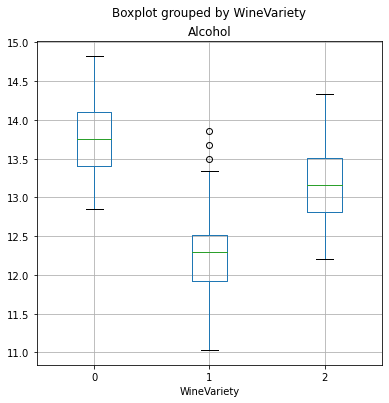

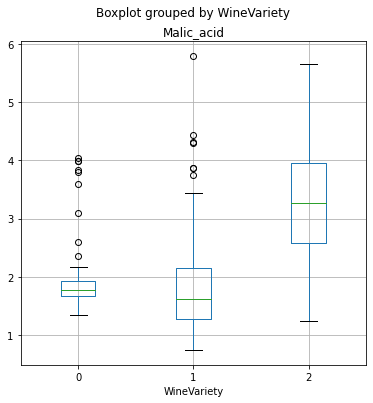

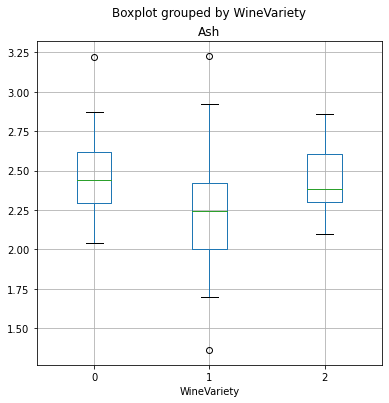

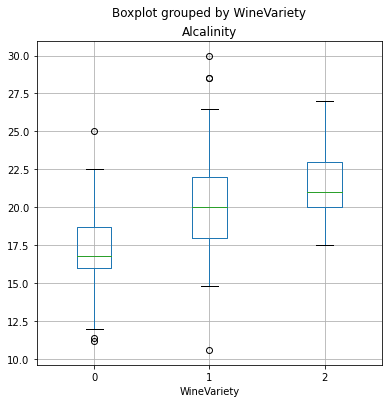

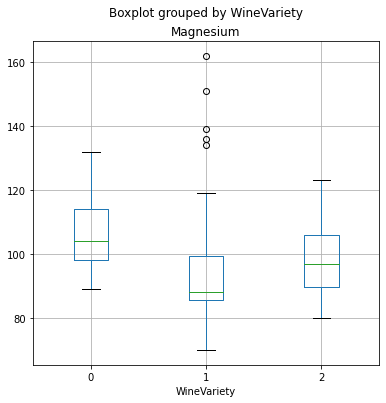

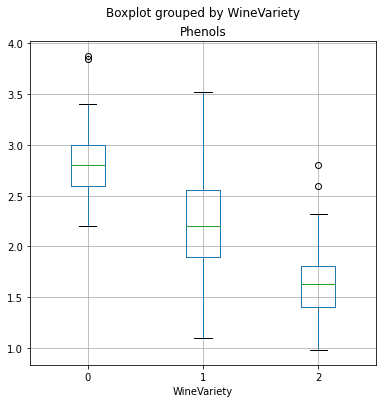

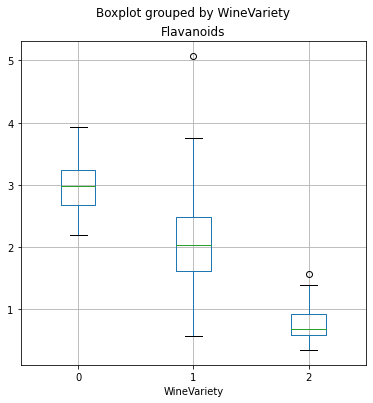

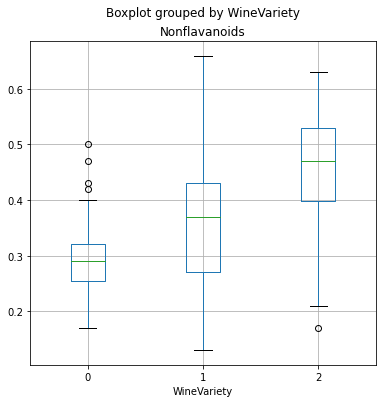

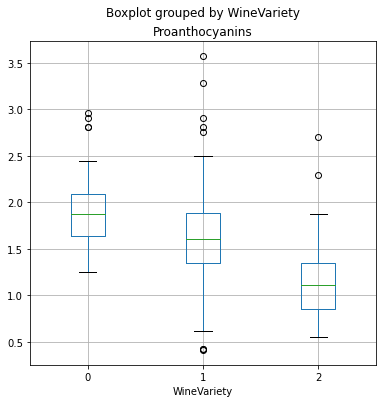

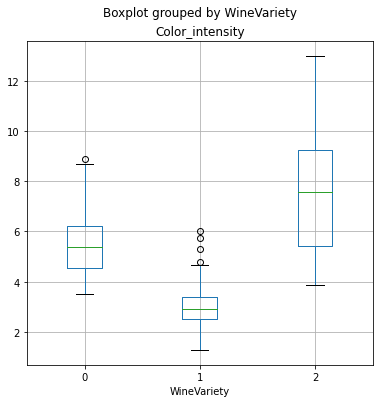

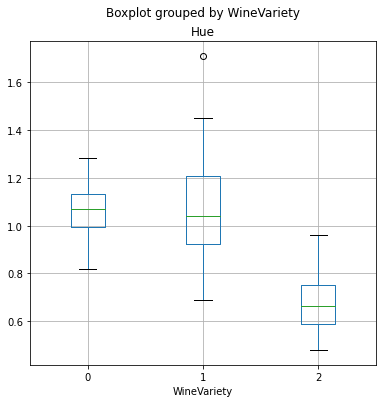

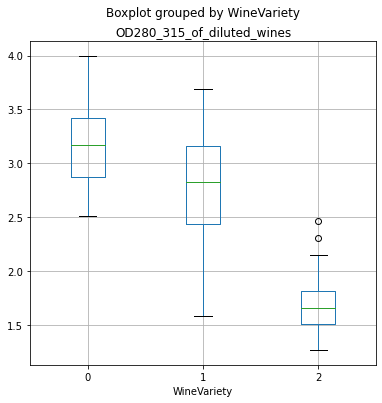

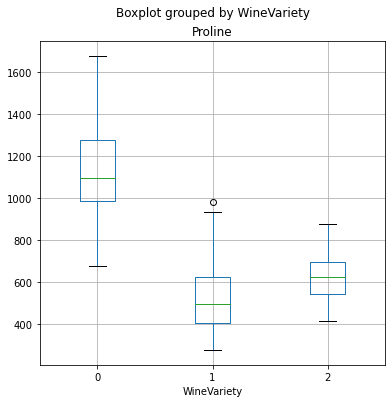

In [16]:
import matplotlib.pyplot as plt
%matplotlib inline

feats = ['Alcohol','Malic_acid','Ash','Alcalinity','Magnesium','Phenols','Flavanoids','Nonflavanoids','Proanthocyanins','Color_intensity','Hue','OD280_315_of_diluted_wines','Proline']
label = 'WineVariety'
for col in feats:
    data.boxplot(column=col, by=label, figsize=(6,6))
    plt.title(col)
plt.show()

In [17]:
from sklearn.model_selection import train_test_split

X, y = data[feats].values, data[label].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0, stratify=y)
print('Training Set: %d, Test Set: %d \n'%(X_train.shape[0], X_test.shape[0]))

Training Set: 124, Test Set: 54 



In [18]:
from sklearn.linear_model import LogisticRegression

reg = 0.1
model = LogisticRegression(C=1/reg, solver='lbfgs', multi_class='auto', max_iter=10000).fit(X_train, y_train)
print(model)

LogisticRegression(C=10.0, max_iter=10000)


In [23]:
predict = model.predict(X_test)
proba = model.predict_proba(X_test)

from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, roc_auc_score

print("Overall Accuracy:", accuracy_score(y_test, predict))
print("Overall Precision:", precision_score(y_test, predict, average='macro'))
print("Overall Recall:", recall_score(y_test, predict, average='macro'))
auc = roc_auc_score(y_test, proba, multi_class='ovr')
print('Avearge AUC:',auc)
mcm = confusion_matrix(y_test, predict)

Overall Accuracy: 0.9629629629629629
Overall Precision: 0.9616228070175438
Overall Recall: 0.9682539682539683
Avearge AUC: 0.9995189995189996


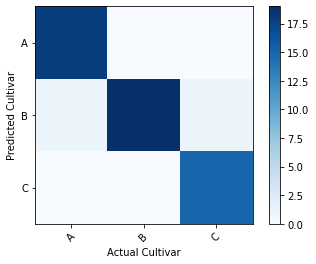

In [20]:
import numpy as np

plt.imshow(mcm, interpolation='nearest', cmap=plt.cm.Blues)
plt.colorbar()
tick_marks = np.arange(len(cultivar))
plt.xticks(tick_marks, cultivar, rotation=45)
plt.yticks(tick_marks, cultivar)
plt.xlabel('Actual Cultivar')
plt.ylabel('Predicted Cultivar')
plt.show()

In [24]:
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC

num_col = [0,1,2,3,4,5,6,7,8,9,10,11,12]
num_trans = Pipeline(steps=[('scaler', StandardScaler())])
preprocessor = ColumnTransformer(
                transformers = [('preprocess', num_trans, num_col)])
pipeline = Pipeline(steps=[('preprocessror', preprocessor),
                           ('regressor', SVC(probability=True))])
model = pipeline.fit(X_train, y_train)
print(model)

Pipeline(steps=[('preprocessror',
                 ColumnTransformer(transformers=[('preprocess',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9,
                                                   10, 11, 12])])),
                ('regressor', SVC(probability=True))])


Overall Accuracy: 1.0
Overall Precision: 1.0
Overall Recall: 1.0
Average AUC: 1.0


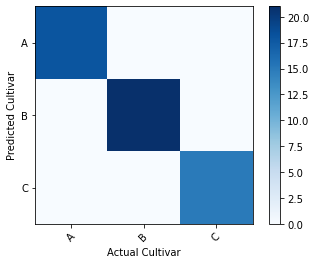

In [29]:
predict = model.predict(X_test)
proba = model.predict_proba(X_test)

print("Overall Accuracy:", accuracy_score(y_test, predict))
print("Overall Precision:", precision_score(y_test, predict, average='macro'))
print("Overall Recall:", recall_score(y_test, predict, average='macro'))
print("Average AUC:", roc_auc_score(y_test, proba, multi_class='ovr'))

mcm = confusion_matrix(y_test, predict)
plt.imshow(mcm, interpolation='nearest', cmap=plt.cm.Blues)
plt.colorbar()
tick_marks = np.arange(len(cultivar))
plt.xticks(tick_marks, cultivar, rotation=45)
plt.yticks(tick_marks, cultivar)
plt.xlabel('Actual Cultivar')
plt.ylabel('Predicted Cultivar')
plt.show()

# Use the model with new data observation

In [30]:
import joblib
filename = './culnivar_model.pkl'
joblib.dump(model, filename)

['./culnivar_model.pkl']

In [34]:
model = joblib.load(filename)
X_new = [[13.72,1.43,2.5,16.7,108,3.4,3.67,0.19,2.04,6.8,0.89,2.87,1285],
         [12.37,0.94,1.36,10.6,88,1.98,0.57,0.28,0.42,1.95,1.05,1.82,520]]

print('New samples: \n{}'.format(X_new))
predict = model.predict(X_new)
for pred in predict:
    print(pred,'('+cultivar[pred]+')')

New samples: 
[[13.72, 1.43, 2.5, 16.7, 108, 3.4, 3.67, 0.19, 2.04, 6.8, 0.89, 2.87, 1285], [12.37, 0.94, 1.36, 10.6, 88, 1.98, 0.57, 0.28, 0.42, 1.95, 1.05, 1.82, 520]]
0 (A)
1 (B)
